# Model C

This model explores the initial establishment of transmission lines between energy producers / consumers.

In the given model, a node is defined by 4 variables:
- **q**: The node's probability of having excess energy at a given point in time
- **s**: The node's probability of having deficit energy at a given point in time
- **latitude**: The latitude of this node
- **longitude**: The longitude of this node

In [3]:
import pandas as pd
import numpy as np
import math
import itertools
import matplotlib.pyplot as plt
import matplotlib.markers as markers
from matplotlib.transforms import offset_copy
from collections import namedtuple

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

%matplotlib inline

In [58]:
n = 1000  # num entities
s = 0.3 # probability of deficit
c = 15  # macrogrid buying price
v = 35  # macrogrid selling price
geo_dist = 'normal'

s_vals = np.random.uniform(0, 1, n)

q_vals = [np.random.uniform(0,s_val) for s_val in s_vals]
q_vals = sorted(q_vals, reverse=True)

def geoVals(geo_dist, axis):
    if axis == 'latitude':
        center = 50.431622
    elif axis == 'longitude':
        center = 30.516645
    if geo_dist == 'normal':
        return np.random.normal(center,0.01,n)
    elif geo_dist == 'uniform':
        return np.random.uniform((center - 0.05), (center + 0.05),n)

df = pd.DataFrame({'q': q_vals, 's': s_vals, 'latitude': geoVals(geo_dist, 'latitude'), 'longitude': geoVals(geo_dist, 'longitude')})
df.head()

,latitude,longitude,q,s
0,50.425122,30.526747,0.960854,0.426423
1,50.444271,30.527484,0.956199,0.961967
2,50.423054,30.518630,0.927067,0.368464
3,50.430046,30.504744,0.923510,0.080395
4,50.428342,30.518899,0.893791,0.924257


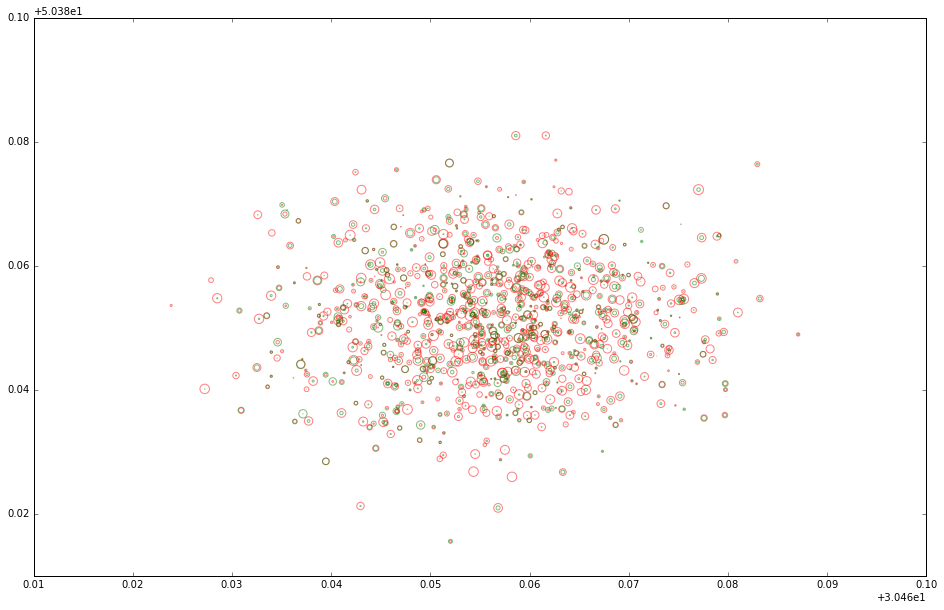

In [59]:
marker_scale = 10

plt.figure(figsize=(16,10))
plt.scatter(df.longitude, df.latitude, s=((marker_scale*df.s)**2), facecolors='none', edgecolors='red', alpha=0.5)
plt.scatter(df.longitude, df.latitude, s=((marker_scale*df.q)**2), facecolors='none', edgecolors='green', alpha=0.5)
plt.show()

In [68]:
mgList =  list(df.itertuples(name='Microgrid'))

scale = 5

def distance(mg1, mg2):
    R = 6373 # in kilometers
    (lat1, lon1) = (mg1.latitude, mg1.longitude)
    (lat2, lon2) = (mg2.latitude, mg2.longitude)
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = (math.sin(dlat/2))**2 + math.cos(lat1) * math.cos(lat2) * (math.sin(dlon/2))**2 
    c = 2 * math.atan2( math.sqrt(a), math.sqrt(1-a) ) 
    d = R * c #(where R is the radius of the Earth)
    return d

PairDist = namedtuple('PairDist', 'dist mg1 mg2')

pairs = itertools.combinations(mgList,2)

pairDists = [PairDist(dist=distance(pair[0],pair[1]), mg1=pair[0], mg2=pair[1]) for pair in pairs]

def closeEnough(pairDist):
    scaleProb = 20
    mg1 = pairDist.mg1
    mg2 = pairDist.mg2
    probMatch = (mg1.q * mg2.s) + (mg1.s * mg2.q)
    return probMatch*scaleProb >= pairDist.dist

edges = filter(closeEnough, pairDists)

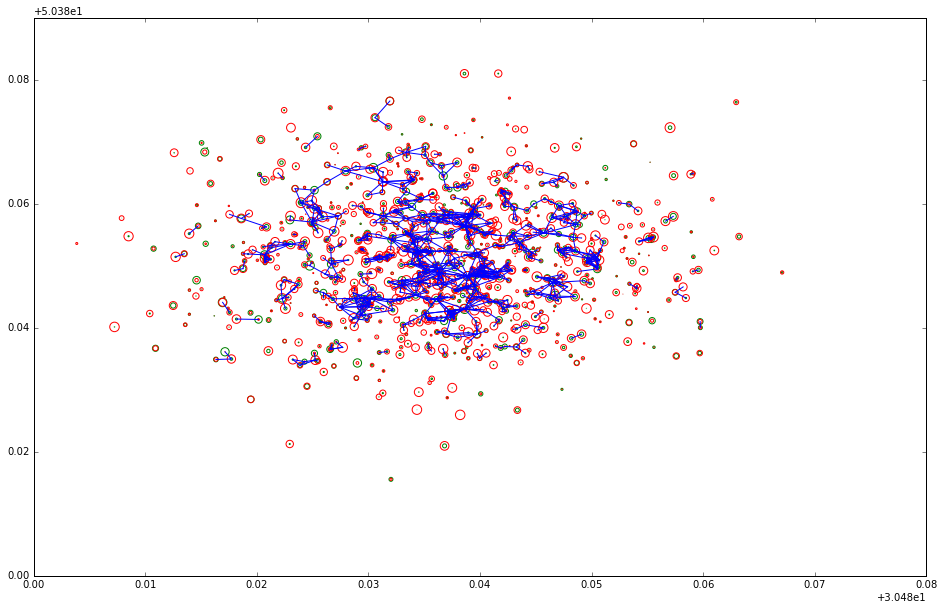

In [69]:
marker_scale = 10

plt.figure(figsize=(16,10))
plt.scatter(df.longitude, df.latitude, s=((marker_scale*df.q)**2), facecolors='none', edgecolors='green')
plt.scatter(df.longitude, df.latitude, s=((marker_scale*df.s)**2), facecolors='none', edgecolors='red')

lines = [[(pair.mg1.longitude, pair.mg2.longitude),(pair.mg1.latitude, pair.mg2.latitude),'b'] for pair in edges]
plotArgs = list(itertools.chain.from_iterable(lines))

plt.plot(*plotArgs)

plt.show()

In [26]:
pairs = list(itertools.combinations(mgList,2))

pairs[:5]

mg = pairs[0][0]

In [32]:
mg

Microgrid(Index=0, latitude=50.431003913242932, longitude=30.502399462434418, q=0.97052924357941406, s=0.7580395210354367)